# Hermes Plot
## *insert some description of what we are looking at (from poster)*
### Penn State Berks PHYS_296 Fall 2017 
#### Authors: *Scott Dolan & Zackary Scalyer* 
#### Advisers: *Dr. Alexey  Prokudin, Dr. Leonard Gamberg, & Dr. Daniel Pitonyak*

In [1]:
############
# imports ##
############
import pandas as pd
import numpy as np
from matplotlib import pyplot as py
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages
# enable plots in the notebook
%matplotlib inline

In [2]:
#####################
# reading the data ##
#####################
#dat=pd.read_excel('E:/Laptop/School/Interships/Dr_Prokudin/Juniper82/PHYS296/dat/expdat/1000.xlsx');
dat=pd.read_excel('C:/Users/Dolam/Documents/Scott/1000.xlsx');

In [3]:
######################
# Calculated values ##
######################
dat["delta"] = np.sqrt(dat["stat_u"]**2.0) # measurment error

In [4]:
##################
## Binning data ##
##################
# data bin edeges

xBin=np.array([0.023,0.047,0.075,0.12,0.35,0.6]) # Bins for x used to plot Pt
Q2Bin=np.array([1.0,10]) # **NOTE** includes all Q2 data, therefore all value data is plotted vs. Pt
zBin= np.array([0.1, 0.2,0.25,0.3, 0.375, 0.475, 0.6, 0.8, 1.1]) # catagories for z to be ploted indiviualy in each subplot

# binning data
dat['xBin'] = pd.cut(dat['x'], xBin,labels = False, retbins=0)
dat['Q2Bin'] = pd.cut(dat['Q2'], Q2Bin,labels = False, retbins=0)
dat['zBin'] = pd.cut(dat['z'], zBin,labels = False, retbins=0)

# bins for x and y that have non-empty intersection
pTdatmod=[0,1,2,3,4] # xBins that overlap Q2Bins
valuedatmod=[0] # Q2bins that overlap xBins

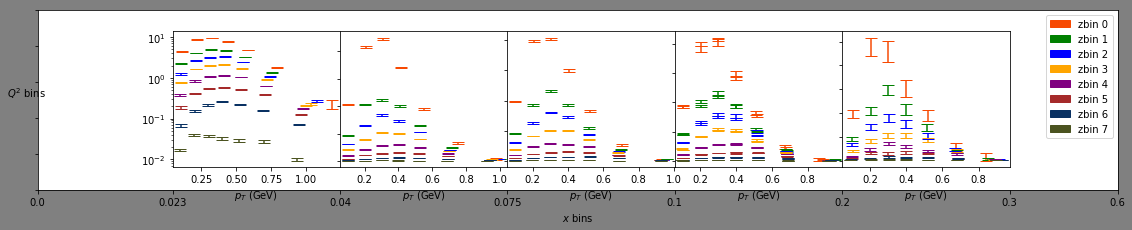

In [29]:
###############
# HermesPlot ##
###############  Reduced matix 
# initialize the figure
fig1=py.figure(figsize=(15, 2.5),facecolor="gray") # figsize; wxh in inche
globalGrid=gridspec.GridSpec(1, 1, wspace=0.0, hspace=0.0) # plot for subplot matrix as 1x1 matrix
innerGrid=gridspec.GridSpecFromSubplotSpec(1,5 , subplot_spec=globalGrid[0], wspace=0.0, hspace=0.0) # 5x6 subplot grid 

# figure properties:
ax=fig1.add_axes([0,0,1,1]) # axas for subplot matrix as percent of hole
#ax.yaxis.set_ticks([0,1.25,2.76,4.27,5.78,7.29,8.8,10])
ax.xaxis.set_ticks([0,1.25,2.8,4.35,5.9,7.45,9,10 ])
xticklabels = np.array([0,0.023,0.04,0.075,0.1,0.2,0.3,0.6]) 

ax.set_yticklabels("")
ax.set_xticklabels(xticklabels)
ax.set_xlabel(r"$x$ bins") # xy-lables
ax.set_ylabel(r"$Q^2$ bins",rotation="horizontal")
#ax.grid() # grid currently off

# subplot axis proerties (unused)
Zcolor=['#F74902',"green","blue",'orange',"purple","brown",'#093162','#4b5320']
Zmark=["o","o","o","o"]

# Set legend
Zpatch1 = mpatches.Patch(color=Zcolor[0], label='zbin 0')
Zpatch2 = mpatches.Patch(color=Zcolor[1], label='zbin 1')
Zpatch3 = mpatches.Patch(color=Zcolor[2], label='zbin 2')
Zpatch4 = mpatches.Patch(color=Zcolor[3], label='zbin 3')
Zpatch5 = mpatches.Patch(color=Zcolor[4], label='zbin 4')
Zpatch6 = mpatches.Patch(color=Zcolor[5], label='zbin 5')
Zpatch7 = mpatches.Patch(color=Zcolor[6], label='zbin 6')
Zpatch8 = mpatches.Patch(color=Zcolor[7], label='zbin 7')

ax.legend(handles=[Zpatch1,Zpatch2,Zpatch3,Zpatch4,Zpatch5,Zpatch6,Zpatch7,Zpatch8],loc='upper right')


for f,F in zip(range(len(pTdatmod)),pTdatmod):       
    for j,J in zip(range(len(valuedatmod)),valuedatmod):
        
        k = int(f) # kth possition for subplot on innerGrid matrix
        maskX = dat['xBin'].isin([F]) # retruns bolinan for all Jth xBin in dat  
        maskY = dat['Q2Bin'].isin([J]) # retruns bolinan for all Fth Q2Bin in dat
       
        ax = fig1.add_subplot(innerGrid[k]) # add subplot in innerGrid
        xydat = dat[maskX & maskY] # subset of data for Jth xBin and Fth Q2Bin
        for z in range(len(zBin)-1): 
            maskZ = xydat["zBin"].isin([z])
            databin = xydat[maskZ]
            
            if f != 0:
                ax.errorbar(databin['pT'],databin['value'],yerr=databin['delta'],capsize=6,linestyle="",color = Zcolor[z])
                ax.set_xlabel(r"$p_T$ (GeV)")
                ax.set_yticklabels('')
               
            else:
                ax.errorbar(databin['pT'],databin['value'],yerr=databin['delta'],capsize=6,linestyle="", color = Zcolor[z])
                
                ax.set_xlabel(r"$p_T$ (GeV)")
                ax.set_yscale('log')